<a href="https://colab.research.google.com/github/acgowda/market-flow/blob/main/model/model_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [41]:
# df = pd.read_csv('/content/drive/Shareddrives/PIC 16B Project/stock_data3.csv')
df = pd.read_csv('/content/drive/Shareddrives/PIC 16B Project/weekly_stock_data_large.csv')
df.head()

,Date,open,high,low,close,volume,ma5,ma20,ma60,ma200,...,week_49,week_5,week_50,week_51,week_52,week_53,week_6,week_7,week_8,week_9
0,2017-10-23,-0.006827,0.016457,0.000830,0.0,0.439489,-0.003581,-0.000712,0.004398,0.003483,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-09,-0.062500,-0.077077,-0.166193,0.0,0.148221,-0.049832,-0.006770,-0.001214,0.000804,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,-0.111638,-0.035583,0.041460,0.0,0.044359,-0.014739,0.002503,0.006842,0.006095,...,0,0,0,0,0,0,0,0,0,0
3,2019-11-11,0.009386,0.033154,0.077009,1.0,-0.298136,0.009926,0.007097,0.004728,0.005310,...,0,0,0,0,0,0,0,0,0,0
4,2022-01-03,0.013204,0.079577,0.010805,0.0,1.295371,0.017303,0.013634,0.011596,0.006865,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df = df[df.columns[1:-53]]
df.head()

,open,high,low,close,volume,ma5,ma20,ma60,ma200,month_1,...,GC=F-ma5,GC=F-ma20,GC=F-ma60,GC=F-ma200,CL=F-close,CL=F-volume,CL=F-ma5,CL=F-ma20,CL=F-ma60,CL=F-ma200
0,-0.006827,0.016457,0.000830,0.0,0.439489,-0.003581,-0.000712,0.004398,0.003483,0.0,...,-0.003860,0.000000,-0.000714,0.000213,0.047212,0.695554,0.012729,0.008408,0.003208,-0.003910
1,-0.062500,-0.077077,-0.166193,0.0,0.148221,-0.049832,-0.006770,-0.001214,0.000804,0.0,...,-0.006587,0.000529,0.002736,0.000927,-0.231347,0.169324,-0.076885,-0.022452,-0.006503,-0.001301
2,-0.111638,-0.035583,0.041460,0.0,0.044359,-0.014739,0.002503,0.006842,0.006095,0.0,...,0.011066,0.005996,0.004498,0.001440,-0.077748,0.035215,-0.040782,-0.011132,-0.003029,-0.000304
3,0.009386,0.033154,0.077009,1.0,-0.298136,0.009926,0.007097,0.004728,0.005310,0.0,...,-0.002070,0.001952,0.003369,0.001460,0.008386,-0.144895,0.010841,-0.000670,-0.003779,0.002617
4,0.013204,0.079577,0.010805,0.0,1.295371,0.017303,0.013634,0.011596,0.006865,1.0,...,0.001665,0.000446,-0.000819,0.001513,0.049063,0.558571,0.035328,0.011165,0.009911,0.001475


In [56]:
X = df.drop(columns=['close'])
y = df['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [63]:
model = tf.keras.models.Sequential([
    layers.Dense(128, input_shape=(73,), activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(2)
])

In [64]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size = 64, 
                    shuffle = True, verbose=1)

Epoch 1/30
330/330 [==============================] - 1s 3ms/step - loss: 7.3478 - accuracy: 0.5434
Epoch 2/30
330/330 [==============================] - 1s 3ms/step - loss: 1.6915 - accuracy: 0.5710
Epoch 3/30
330/330 [==============================] - 1s 3ms/step - loss: 0.7719 - accuracy: 0.5989
Epoch 4/30
330/330 [==============================] - 1s 3ms/step - loss: 0.7000 - accuracy: 0.6138
Epoch 5/30
330/330 [==============================] - 1s 3ms/step - loss: 0.6626 - accuracy: 0.6213
Epoch 6/30
330/330 [==============================] - 1s 3ms/step - loss: 0.6453 - accuracy: 0.6346
Epoch 7/30
330/330 [==============================] - 1s 3ms/step - loss: 0.6289 - accuracy: 0.6375
Epoch 8/30
330/330 [==============================] - 1s 3ms/step - loss: 0.6320 - accuracy: 0.6444
Epoch 9/30
330/330 [==============================] - 1s 3ms/step - loss: 0.6306 - accuracy: 0.6418
Epoch 10/30
330/330 [==============================] - 1s 3ms/step - loss: 0.6275 - accuracy: 0.6490

In [65]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy :', accuracy)

283/283 [==============================] - 1s 2ms/step - loss: 0.6017 - accuracy: 0.6685
Test accuracy : 0.6685113310813904


In [66]:
df2 = pd.read_csv('/content/drive/Shareddrives/PIC 16B Project/test_stocks.csv')
df2.head()

,Date,close,open,high,low,volume,ma5,ma20,ma60,ma200,...,^GSPC-volume,^GSPC-ma5,^GSPC-ma20,^GSPC-ma60,^GSPC-ma200,^VIX-close,^VIX-ma5,^VIX-ma20,^VIX-ma60,^VIX-ma200
0,2021-09-27,0.0,0.559833,0.401174,0.641137,-0.579245,0.458167,-0.052220,-1.046358,0.117847,...,-0.803180,1.687999,1.771267,1.764645,1.567048,-0.016410,0.137693,0.016000,-0.111738,0.158469
1,2021-09-28,0.0,0.427936,0.259966,0.360757,-0.437262,0.450177,-0.012513,-1.022518,0.178964,...,-0.358725,1.687565,1.758907,1.764652,1.572679,0.495866,0.111809,0.059698,-0.092514,0.159132
2,2021-09-29,0.0,0.299649,0.140253,0.341591,-0.712706,0.428906,0.028838,-0.996923,0.252754,...,-1.071015,1.677487,1.747454,1.765034,1.578406,0.417142,0.151218,0.097330,-0.078131,0.158451
3,2021-09-30,1.0,0.193452,0.052171,0.295591,-0.734789,0.345851,0.064119,-0.965703,0.349409,...,-0.715940,1.638088,1.732260,1.763819,1.583836,0.483316,0.256388,0.140842,-0.061821,0.157016
4,2021-10-01,0.0,0.310800,0.241541,0.451114,-0.332236,0.313551,0.114101,-0.926103,0.472845,...,-0.691745,1.610667,1.719636,1.764689,1.589286,0.250567,0.334507,0.169871,-0.056886,0.155390


In [67]:
def plot_history(hist):
    plt.plot(hist.history["accuracy"], label = "training")
    # plt.plot(hist.history["val_accuracy"], label = "validation")
    plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
    plt.legend()
    plt.show()

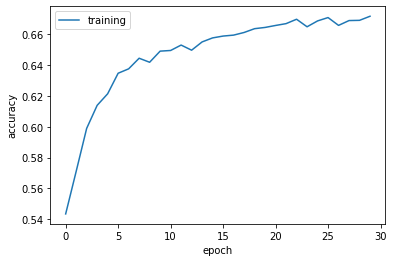

In [68]:
plot_history(history)

In [70]:
import pickle
with open('/content/drive/Shareddrives/PIC 16B Project/model2.pkl' , 'wb') as f:
    pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://b34bcd06-0c3e-4d2c-8053-e9ad3768700a/assets
